# Validation of Plan_to_lata.py script

In [1]:
from trustutils import run

run.introduction("N. DJATI","13/04/2021")

## Introduction 
 Validation made by : N. DJATI



 Report created : 13/04/2021



 Report generated 27/01/2022

### Description 

Plan_to_lata.py script converts .plan files generated by **TRUST** plane probes into LATA format, which allows to visualize the plane probes locations and the post-processed field at these probes using VisIt. This script converts .plan issued from:

* 2D computations into LATA files.
* 3D computations into LATA in the plane (x,y).  This will be helpful if we want to post-process the field provided by the probe using VisIt.  Note that it is not possible to convert a .plan file with an inclined plane into lata in the plane (x,y) since no component is constant and so removing the x-, y- or z-component will make vizualization incorrect.
* 3D computations into LATA where the plan is represented in the 3D-coordinate system (x,y,z).  This is helpful if you want to show beautiful and representative images of your simulation or to check that the plan probe positions are the desired ones.

In this validation form, we will show various examples of vizualizations.  In addition, we will use the -l option for conversion which extracts only the last time of the simulation from the plane probe.

In [2]:
run.TRUST_parameters("1.7.7")

### TRUST parameters 
 * Version TRUST: 1.7.7
 * Binary used: /volatile/catA/ll258196/trust-code/exec/TRUST_mpi_opt (built on TRUST /volatile/catA/ll258196/trust-code/Validation/Rapports_automatiques/jupyter/Verification_codage/Plan_to_lata_conversion_script/build)

In [3]:
from trustutils import run 
run.addCase("sim3D" ,"Canal.data")  
run.addCase("sim2D" ,"Obstacle.data")
run.printCases()
run.runCases()

### Test cases 
* sim3D/Canal.data : 
* sim2D/Obstacle.data : 


Running **with Sserver**...
  => A total of 2 cases were (successfully) run in 1.4s.


## 2D simulation:
In the Obstacle.data datafile, we add two probes as follows:

**Probes**\
$\hspace{1cm} \{ $\
$\hspace{1cm}$ P_Probe **pression  periode** 0.01 **plan** 23 11 0.01 0.005 0.91 0.005 0.01 0.21 \
$\hspace{1cm}$ V_Probe **vitesse periode** 0.01 **plan** 23 11 0.01 0.005 0.91 0.005 0.01 0.21 \
$\hspace{1cm} \} $

At the end of the execution of Obstacle.data, TRUST will generate two PLAN files: Obstacle_P_PROBE.plan and Obstacle_V_PROBE.plan

### Visualization of the pressure probe

In order to convert Obstacle_P_PROBE.plan to Obstacle_P_PROBE.lata, we can use commands: 

$\hspace{5mm}$ python Plan_to_lata.py  Obstacle_P_PROBE -l \
or \
$\hspace{5mm}$ python Plan_to_lata.py Obstacle_P_PROBE.plan -l \
or \
$\hspace{5mm}$ python Plan_to_lata.py Obstacle_P_PROBE.plan  Obstacle_P_PROBE.lata -l 

where -l option allows to extract only the last time step from the .plan file before conversion to LATA format.

Below, we draw the mesh of the whole domain with the pressure field on the probe P_PROBE.


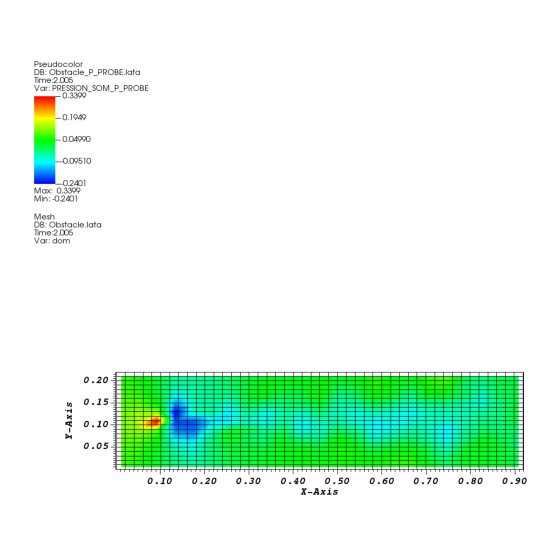

In [4]:
from trustutils import visit 

a=visit.Show("./sim2D/Obstacle_P_PROBE.lata","Pseudocolor","PRESSION_SOM_P_PROBE",plotmesh=False)
a.addField("./sim2D/Obstacle.lata","Mesh","dom")
a.plot()

## Pressure vizualization on the plane probe using the extrait_coupe tool

In [5]:
run.executeScript("extrait_coupe ./sim2D/Obstacle P_PROBE")

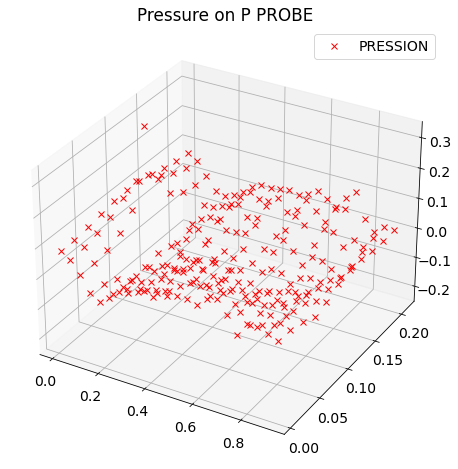

In [6]:
from trustutils import plot
import matplotlib.pyplot as plt

x= plot.loadText("./sim2D/Obstacle_P_PROBE.coupe")

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x[0],x[1],x[2],"rx",label="PRESSION")
plt.title("Pressure on P PROBE")
plt.legend()

plt.show()

## Visualization of the velocity probe

Velocity field on the V PROBE written in Obstacle V PROBE.plan file can be converted to toto obstacle.lata using commands:

$\hspace{5mm}$ python Plan_to_lata.py Obstacle_V_PROBE toto_obstacle -l \
or \
$\hspace{5mm}$ python Plan_to_lata.py Obstacle_V_PROBE.plan toto_obstacle -l

Below, we draw the grid of V PROBE plane and the velocity magnitude on the probe V PROBE.

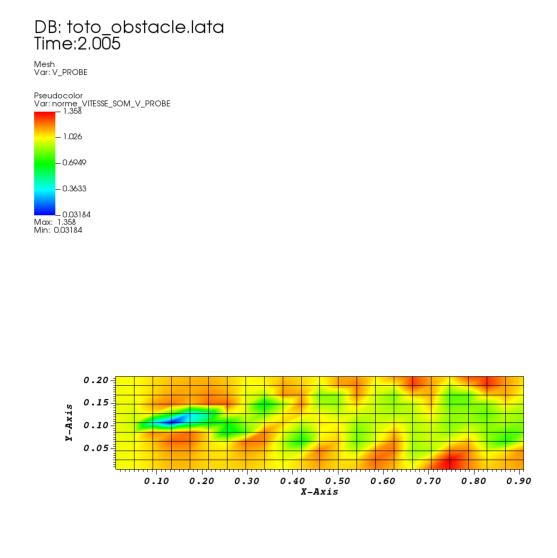

In [7]:
a=visit.Show("./sim2D/toto_obstacle.lata","Pseudocolor","norme_VITESSE_SOM_V_PROBE",mesh="V_PROBE")
a.plot()

## 3D simulation:

In the Canal.data datafile, we add plane probes as follows: 

**Probes**\
$\hspace{1cm} \{ $\
$\hspace{1cm}$ sonde_PX1Z **pression  periode** 1e-10 **plan** 6 6 0. 1. 0. 10. 1. 0. 0. 1. 5. \
$\hspace{1cm}$ sonde_PXY1 **pression  periode** 1e-10 **plan** 6 6 0. 0. 1. 10. 0. 1. 0. 2. 1. \
$\hspace{1cm}$ sonde_VXY0 **vitesse periode** 1e-10 **plan** 6 6 1.5 0. 0. 6. 0. 0. 1.5 2. 0. \
$\hspace{1cm}$ sonde_pInclined **pression  periode** 1e-10 **plan** 6 6 0. 0. 0. 0. 2. 0. 10. 0. 5. \
$\hspace{1cm}$ sonde_PXYZ **pression  periode** 1e-10 **plan** 6 6 3. -1. 0. 3. 4. 0. 3. -1. 5. \
$\hspace{1cm}$ sonde_V4YZ **vitesse periode** 1e-10 **plan** 12 17 4. 0. 0. 4. 2. 0. 4. 0. 5. \
$\hspace{1cm} \} $

At the end of the execution of Canal.data, TRUST will generate 6 PLAN files.


### 2D visualization of the pressure on y=1 plane probe

in order to convert the plan file containing data on the plane probe y=1 into a lata file       with values drawed on (x=X, y=Z) plan, we can use: 

$\hspace{5mm}$ python Plan_to_lata.py Canal_SONDE_PX1Z TwoDimRepresentation -lp \
or \
$\hspace{5mm}$ python Plan_to_lata.py Canal_SONDE_PX1Z.plan TwoDimRepresentation.lata -l -p

where the option -p allows to consider the plane issued from the 3D simulation as a plane issued from a 2D simulation (by removing the constant component among x,y,z)

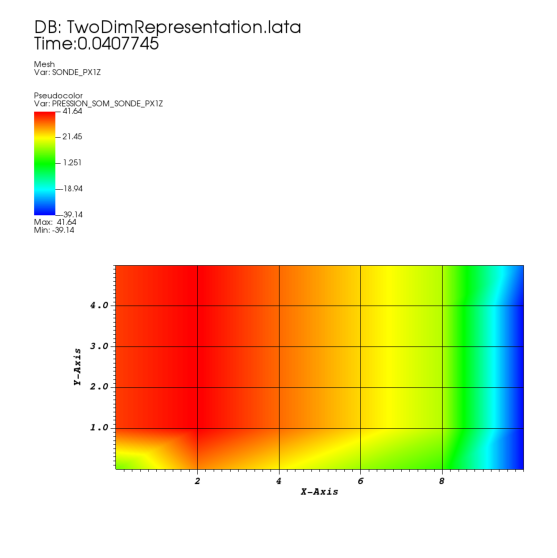

In [8]:
a=visit.Show("./sim3D/TwoDimRepresentation.lata","Pseudocolor","PRESSION_SOM_SONDE_PX1Z",mesh="SONDE_PX1Z")
a.visitCommand("f=open('Coupe1_extrm_vn_trust','w')")
a.visitCommand("Query('Min', use_actual_data=1)")
a.visitCommand("f.write(str(GetQueryOutputValue()))")
a.visitCommand("Query('Max', use_actual_data=1)")
a.visitCommand("f.write(\" \"+str(GetQueryOutputValue()))")
a.visitCommand("f.close()")

a.plot()

In [9]:
run.executeScript("extrait_coupe sim3D/Canal SONDE_PX1Z")

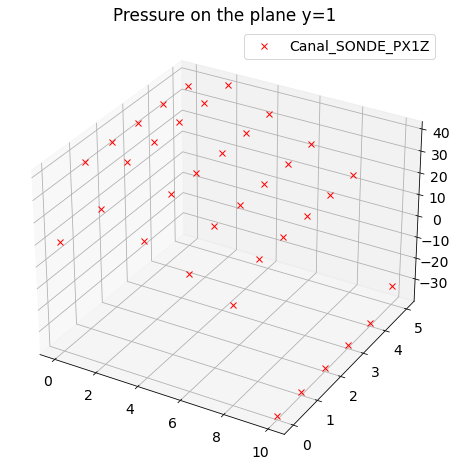

In [10]:
x= plot.loadText("./sim3D/Canal_SONDE_PX1Z.coupe")

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x[0],x[1],x[2],"rx",label="Canal_SONDE_PX1Z")
plt.title("Pressure on the plane y=1")
plt.legend()

plt.show()

### 3D visualization of the pressure on y=1 plane probe

In order to convert the plan file containing data on the plane probe y=1 into a lata file and keep the 3D representation of the plane, we can use:

$\hspace{5mm}$ python Plan_to_lata.py Canal_SONDE_PX1Z -l \
or \
$\hspace{5mm}$ python Plan_to_lata.py Canal_SONDE_PX1Z.plan Canal_SONDE_PX1Z.lata -l

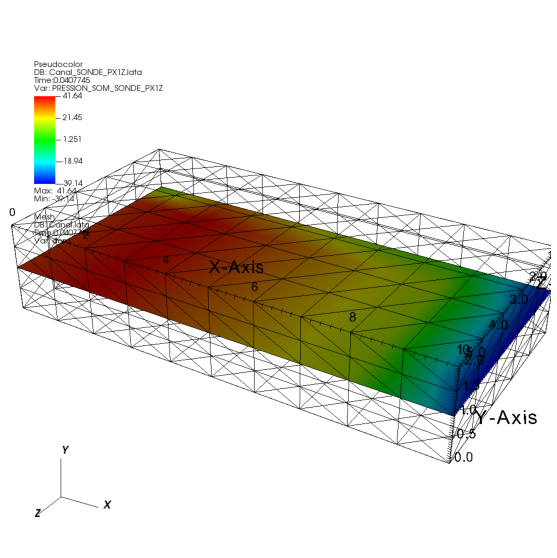

In [11]:
a=visit.Show("./sim3D/Canal_SONDE_PX1Z.lata","Pseudocolor","PRESSION_SOM_SONDE_PX1Z",plotmesh=False)
a.normal3D([0.4543768,0.477396,0.733606])
a.addField("sim3D/Canal.lata","Mesh","dom")
a.plot()

### Pressure visualization at z=1 plane

In order to convert the plan file containing data on the plane probe z=1 into a lata file and keep the 3D representation of the plane, we can use:

$\hspace{5mm}$ python Plan_to_lata.py Canal_SONDE_PXY1 -l \
or \
$\hspace{5mm}$ python Plan_to_lata.py Canal_SONDE_PXY1.plan Canal_SONDE_PXY1.lata -l

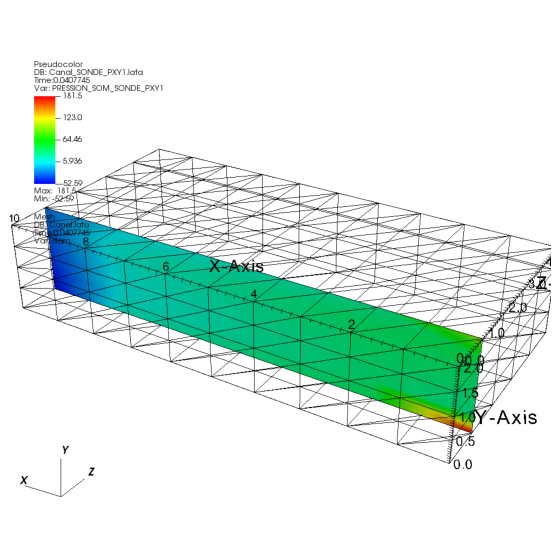

In [12]:
a=visit.Show("./sim3D/Canal_SONDE_PXY1.lata","Pseudocolor","PRESSION_SOM_SONDE_PXY1",plotmesh=False)
a.normal3D([-0.4543768,0.477396,-0.733606])
a.addField("sim3D/Canal.lata","Mesh","dom")
a.plot()

### Velocity magniture on the SONDE_VXY0 plane

In order to convert the plan file containing data on the plane probe z=0 into a lata file and keep the 3D representation of the plane, we can use:

$\hspace{5mm}$ python Plan_to_lata.py Canal_SONDE_VXY0 -l \
or \
$\hspace{5mm}$ python Plan_to_lata.py Canal_SONDE_VXY0.plan Canal_SONDE_VXY0.lata -l

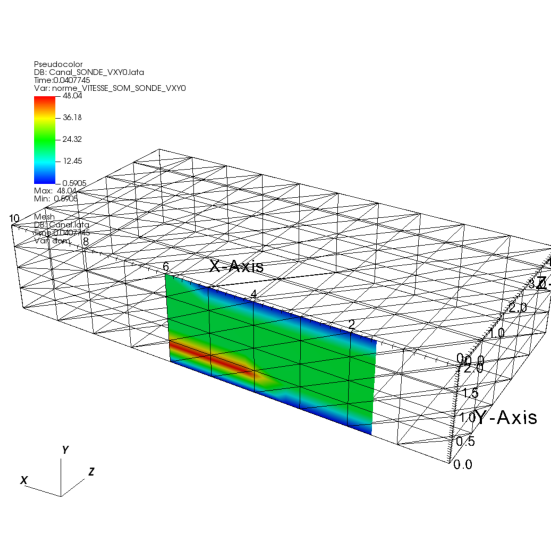

In [13]:
a=visit.Show("./sim3D/Canal_SONDE_VXY0.lata","Pseudocolor","norme_VITESSE_SOM_SONDE_VXY0",plotmesh=False)
a.normal3D([-0.4543768,0.477396,-0.733606])
a.addField("sim3D/Canal.lata","Mesh","dom")
a.plot()

### Pressure field on an inclined plane

In order to convert the plan file containing data on the inclined plane probe into a lata file and keep the 3D representation of the plane, we can use:

$\hspace{5mm}$ python Plan_to_lata.py Canal_SONDE_PINCLINED -l \
or \
$\hspace{5mm}$ python Plan_to_lata.py Canal_SONDE_PINCLINED.plan Canal_SONDE_PINCLINED.lata -l

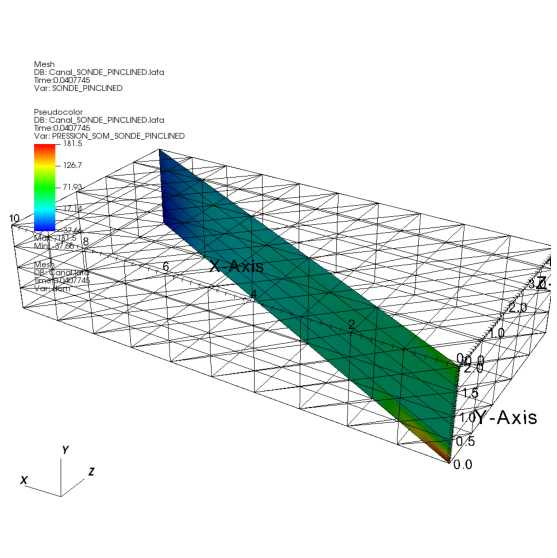

In [14]:
a=visit.Show("./sim3D/Canal_SONDE_PINCLINED.lata","Pseudocolor","PRESSION_SOM_SONDE_PINCLINED",mesh="SONDE_PINCLINED")
a.normal3D([-0.4543768,0.477396,-0.733606])
a.addField("sim3D/Canal.lata","Mesh","dom")
a.plot()

### Visualization of a plan that overflows domain boundaries

In order to convert the plan file containing data on the plane probe x=3 into a lata file and keep the 3D representation of the plane, we can use:

$\hspace{5mm}$ python Plan_to_lata.py Canal_SONDE_PXYZ -l \
or \
$\hspace{5mm}$ python Plan_to_lata.py Canal_SONDE_PXYZ.plan Canal_SONDE_PXYZ.lata -l

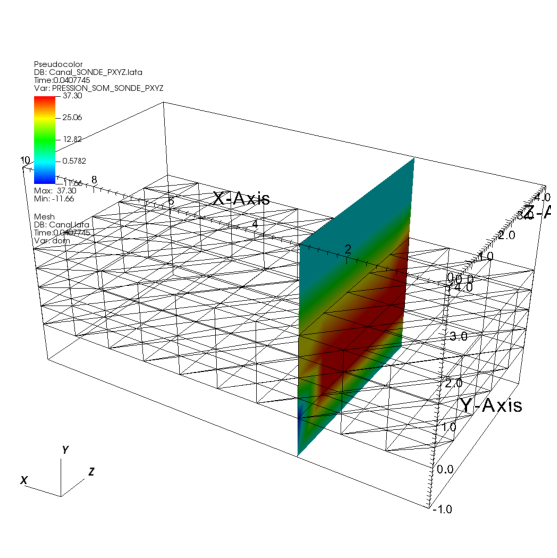

In [15]:
a=visit.Show("./sim3D/Canal_SONDE_PXYZ.lata","Pseudocolor","PRESSION_SOM_SONDE_PXYZ",plotmesh=False)
a.normal3D([-0.4543768,0.477396,-0.733606])
a.addField("sim3D/Canal.lata","Mesh","dom")
a.plot()

### Velocity vectors on the x=4 plane

In order to convert the plan file containing data on the plane probe x=4 into a lata file and keep the 3D representation of the plane, we can use:

$\hspace{5mm}$ python Plan_to_lata.py Canal_SONDE_V4YZ -l \
or \
$\hspace{5mm}$ python Plan_to_lata.py Canal_SONDE_V4YZ.plan Canal_SONDE_V4YZ.lata -l

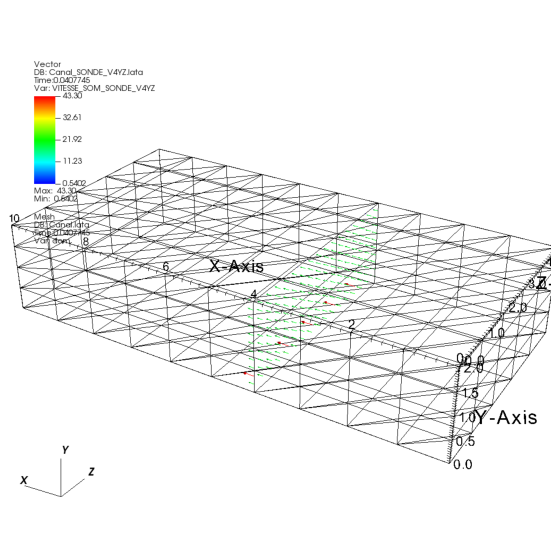

In [16]:
a=visit.Show("./sim3D/Canal_SONDE_V4YZ.lata","Vector","VITESSE_SOM_SONDE_V4YZ",plotmesh=False)
a.normal3D([-0.4543768,0.477396,-0.733606])
a.addField("sim3D/Canal.lata","Mesh","dom")
a.plot()